# Baseline model to simulate outbreak

#### Author: Yiran Jing

#### Date: Feb 2020


## Contents:
1. EDA and Feature Engineering
1. Polynomial regression
   1. Chinese total comfirmed cases
   2. For each province
   
## Summary
For Polynomial regression, 
- China total comfirmed cases, optimal degree is 2, and seems fit well.
- Both Ex-hubei and Hubei, ptimal degree is 2.


In [1]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
import pandas as pd
import pandas
import datetime
import matplotlib.dates as mdates
from helper_fun_model import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%time
## Update data from DXY
! cd ../data_processing && python DXY_AreaData_query.py

2020-02-10 23:04:37Update records successfully to ../data/DXY_Chinese.csv
Save area daily dataset (English) into ../data/DXYArea.csv
CPU times: user 182 ms, sys: 57 ms, total: 239 ms
Wall time: 13.5 s


In [3]:
## Load data 
df = pd.read_csv("../data/DXYArea.csv")
"""
Data Cleaning 
"""
df = df[df['date'] != df['date'].max()] # remove todays' records (since it can be incompleted)
df = add_days(df) # add the number of days after 2019-12-08

df.tail(3) # check new

,date,country,countryCode,province,city,confirmed,suspected,cured,dead,Days
5739,2020-02-09,泰国,TH,NaN,NaN,32,0,8,0,63
5740,2020-02-09,美国,US,NaN,NaN,12,0,3,0,63
5741,2020-02-09,越南,VN,NaN,NaN,14,0,3,0,63


In [4]:
increase_date = [df['date'].unique()]
increase_date.sort() # sort increasting order

### EDA

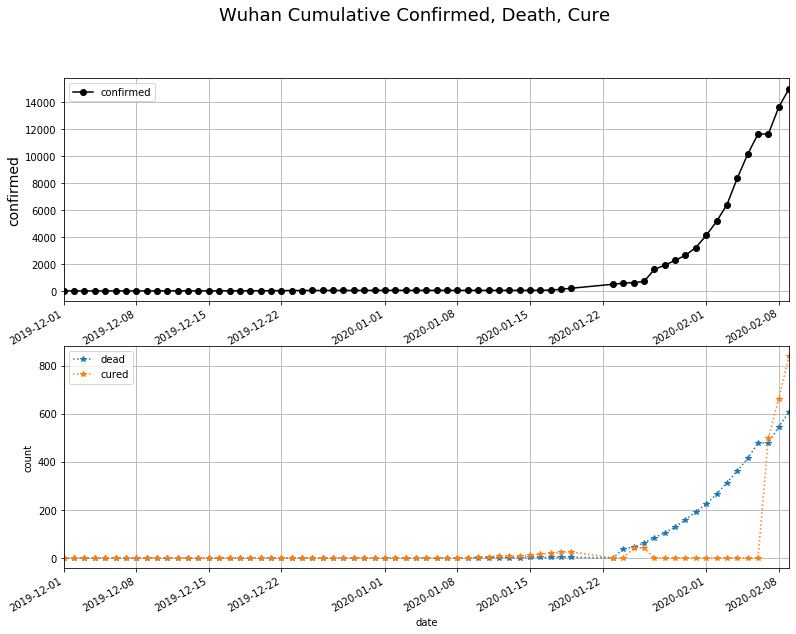

In [5]:
# Input City name or Province name
draw_city_trend("Wuhan", df) # city 

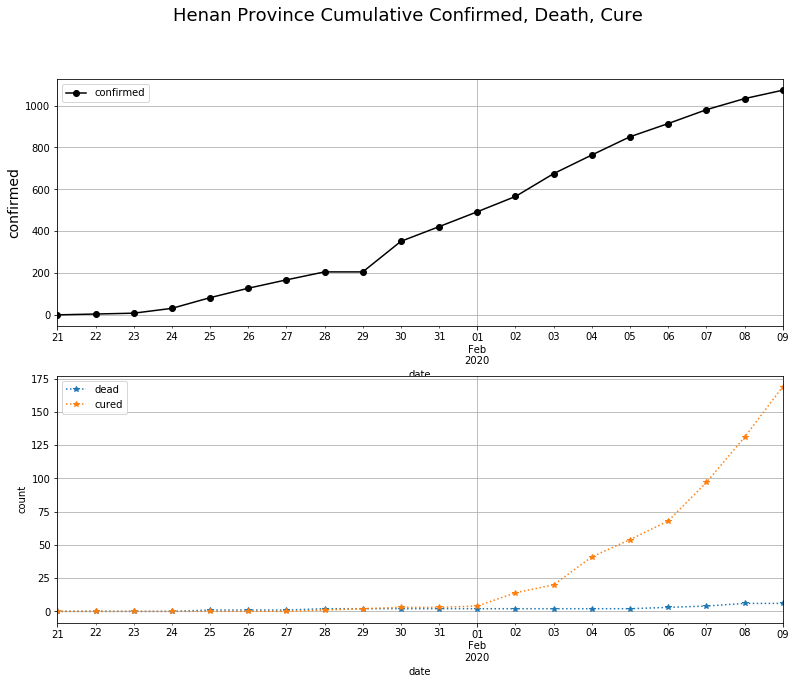

In [6]:
draw_province_trend("Henan Province", get_province_df(df, "Henan Province"))

## Polynomial regression

### Case1: Overall China

In [34]:
get_province_df(df, "Henan Province").tail()

,date,country,countryCode,province,city,confirmed,suspected,cured,dead,Days
4195,2020-02-05,中国,CN,Henan Province,NaN,851,45,54,2,59
4519,2020-02-06,中国,CN,Henan Province,NaN,914,66,68,3,60
4865,2020-02-07,中国,CN,Henan Province,NaN,980,0,97,4,61
5210,2020-02-08,中国,CN,Henan Province,NaN,1033,0,131,6,62
5555,2020-02-09,中国,CN,Henan Province,NaN,1073,0,169,6,63


In [33]:
China_total.tail()

,date,country,countryCode,province,city,confirmed,suspected,cured,dead,Days
4042,2020-02-05,中国,CN,NaN,NaN,28018,24702,1153,563,59
4365,2020-02-06,中国,CN,NaN,NaN,31161,26359,1540,636,60
4711,2020-02-07,中国,CN,NaN,NaN,34594,27657,2052,723,61
5056,2020-02-08,中国,CN,NaN,NaN,37162,28942,2651,812,62
5401,2020-02-09,中国,CN,NaN,NaN,40235,23589,3283,909,63


In [23]:
"""
Sum up all province within China
"""
# China total
China_df = df[df['date'] > datetime.datetime(2020, 1, 14)] 

China_total = get_China_total(China_df)

Train, Test = split_train_test_by_date(China_total)

X_train = Train['Days']
y_train = Train['confirmed']
X_test =  Test['Days']
y_test = Test['confirmed']

Train dataset: data before 2020-02-07 00:00:00 
Test dataset: the last 3 days


Degree 1:
RMSE of training set is 4215.3717393418665
R2 score of training set is 0.8107622100232197

RMSE of test set is 12293.896579051478
R2 score of test set is -27.42231881093724
---------------------------------------

Degree 3:
RMSE of training set is 302.2055574604981
R2 score of training set is 0.9990273849140988

RMSE of test set is 4899.95391347012
R2 score of test set is -3.5150689460420255
---------------------------------------

Degree 2:
RMSE of training set is 711.2530104075389
R2 score of training set is 0.9946125364680652

RMSE of test set is 1481.583958837284
R2 score of test set is 0.587206423713632
---------------------------------------



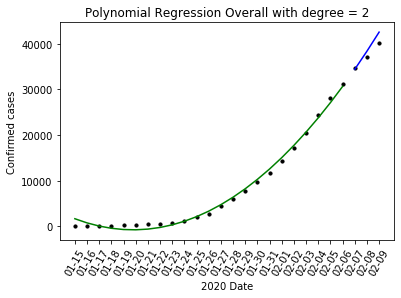

In [24]:
"""
Model selection:
  find optimal degree level
  Then draw plot using the optimal degree
"""
# select the best degree 
create_polynomial_regression_model(1, "Overall", China_total, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(3, "Overall", China_total , X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(2, "Overall", China_total, X_train, X_test, y_train, y_test, draw_plot = True)

**based on the result above, we can clearly see that degree = 2 gives us best estimation. So now we use degree = 2 to predict the next 4 days**


🍎Forescast the next 4 days
Degree 2:
RMSE of training set is 768.1287189961382
R2 score of training set is 0.9965595484113774

---------------------------------------



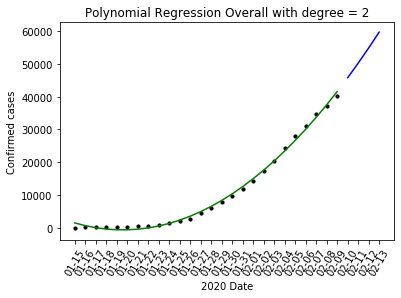

In [25]:
print("\n🍎Forescast the next 4 days")
forecast_next_4_days(2, "Overall", China_total)

### Case2: Each Province

Train dataset: data before 2020-02-07 00:00:00 
Test dataset: the last 3 days
Degree 1:
RMSE of training set is 3184.9021404473033
R2 score of training set is 0.7743691249788935

RMSE of test set is 10427.667090753243
R2 score of test set is -28.67223543177084
---------------------------------------

Degree 3:
RMSE of training set is 206.9077571377393
R2 score of training set is 0.9990477304701437

RMSE of test set is 3794.4175671393727
R2 score of test set is -2.9288567618367067
---------------------------------------

Degree 2:
RMSE of training set is 765.9472248774551
R2 score of training set is 0.9869501945775108

RMSE of test set is 677.7201770409174
R2 score of test set is 0.8746637253154781
---------------------------------------



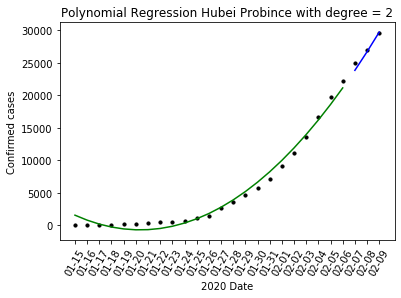


🍎Forescast the next 4 days
Degree 2:
RMSE of training set is 748.2664812931697
R2 score of training set is 0.9937265042123012

---------------------------------------



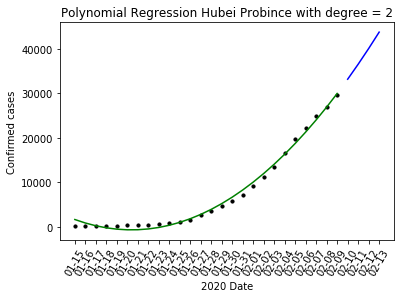

In [26]:
# See Hubei Province 
Hubei= get_province_df(China_df, "Hubei Province")
 
X_train, X_test, y_train, y_test = data_processing(Hubei)    

# select the best degree 
create_polynomial_regression_model(1, "Hubei Probince", Hubei, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(3, "Hubei Probince", Hubei, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(2, "Hubei Probince", Hubei, X_train, X_test, y_train, y_test, draw_plot = True)

print("\n🍎Forescast the next 4 days")
forecast_next_4_days(2, "Hubei Probince", Hubei)

Train dataset: data before 2020-02-07 00:00:00 
Test dataset: the last 3 days
Degree 1:
RMSE of training set is 4215.3717393418665
R2 score of training set is 0.8107622100232197

RMSE of test set is 12293.896579051478
R2 score of test set is -27.42231881093724
---------------------------------------

Degree 3:
RMSE of training set is 302.2055574604981
R2 score of training set is 0.9990273849140988

RMSE of test set is 4899.95391347012
R2 score of test set is -3.5150689460420255
---------------------------------------

Degree 2:
RMSE of training set is 711.2530104075389
R2 score of training set is 0.9946125364680652

RMSE of test set is 1481.583958837284
R2 score of test set is 0.587206423713632
---------------------------------------



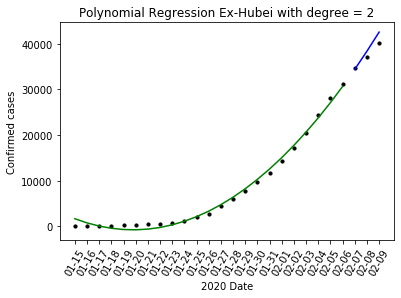


🍎Forescast the next 4 days
Degree 2:
RMSE of training set is 768.1287189961382
R2 score of training set is 0.9965595484113774

---------------------------------------



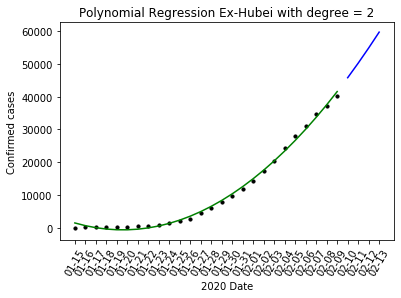

In [28]:
# See Hubei Province 
NotHubei= China_df[(China_df['province']!="Hubei Province") & (China_df['province'].isnull()) 
                   & (df['countryCode']=='CN') ]


X_train, X_test, y_train, y_test = data_processing(NotHubei)    

# select the best degree 
create_polynomial_regression_model(1, "Ex-Hubei", NotHubei, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(3, "Ex-Hubei", NotHubei, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(2, "Ex-Hubei", NotHubei, X_train, X_test, y_train, y_test, draw_plot = True)

print("\n🍎Forescast the next 4 days")
forecast_next_4_days(2, "Ex-Hubei", NotHubei)